In [734]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [1274]:
df_field = pd.read_fwf('../laminarbl.csv',widths=30*[20]) #the complete fi?eld
df_num = df_field[df_field['x']==df_field['x'].unique()[25]]
df_num = df_num.iloc[1:]


In [1275]:
Re=180
Pr = 0.71
yplus = np.logspace(-1,3)
viscous = Pr*yplus
loglayer = 2.78*np.log(yplus)+1.9

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3097: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_xlim(lower, upper, auto=None)


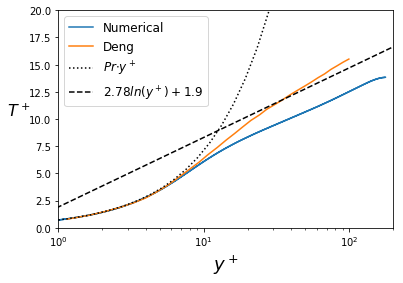

In [1284]:
df_val = pd.read_csv("validation_data/Deng(2001)_Tplus.csv",
           sep = '\t', header=None, names=['yp','Tplus'])
fig, ax = plt.subplots()
ax.set_xscale("log")
df_num.plot('yplus', 'tplus',ax=ax, label='Numerical')
df_val.plot('yp', 'Tplus',ax=ax, label="Deng")
ax.plot(yplus,viscous, linestyle=':', color='k', label=r'$Pr{\cdot}y^+$')
ax.plot(yplus,loglayer, linestyle = '--', color='k', label=r'$2.78ln(y^+)+1.9$')
ax.set_xbound(1,200)
ax.set_ybound(0,20)
ax.set_xbound(0,200)
ax.set_xlabel(r"$y^+$", fontsize=18)
ax.set_ylabel(r"$T^+$",rotation=0, labelpad=10, fontsize=16)
ax.legend(prop={'size': 12})

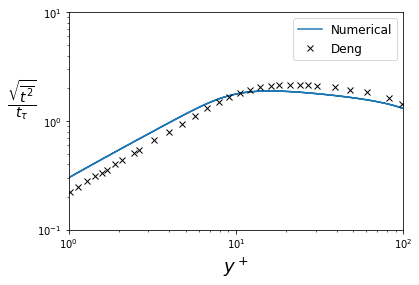

In [1281]:
df_val_kt = pd.read_csv("validation_data/Deng(2001)_kt.csv", 
                         sep='\t', header=None, names=['yplus','kt'])
fig, ax = plt.subplots()
df_num['kt_scaled'] = -1*np.sqrt(df_num['kt'])/df_num['ttau']
df_num.plot('yplus', 'kt_scaled',ax=ax, label='Numerical')
df_val_kt.plot("yplus", "kt",ax=ax, marker='x', 
               linestyle="None", color='k', label='Deng')
ax.set_xscale("log")
ax.set_yscale('log')
ax.set_ybound(0.1,10)
ax.set_xbound(1,100)
ax.set_xlabel(r"$y^+$", fontsize=18)
ax.set_ylabel(r"$\frac{\sqrt{\overline{t^2}}}{t_{\tau}}$", 
              rotation=0, fontsize=20, labelpad=15)
ax.legend(prop={'size': 12})

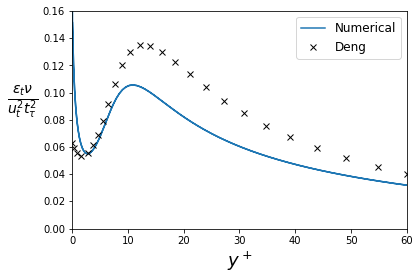

In [1282]:
df_val_eps = pd.read_csv("validation_data/Deng(2001)_epst.csv", 
                         sep='\t', header=None, names=['yplus','epst'])
fig, ax = plt.subplots()
df_num['eps_scaled'] = df_num['epst']/((df_num['ttau']**2))*(1/180.)
df_num.plot('yplus', 'eps_scaled',ax=ax, label='Numerical')
df_val_eps.plot('yplus', 'epst',ax=ax, 
                marker='x', linestyle="None", color='k', label='Deng')
ax.set_ybound(0,0.16)
ax.set_xbound(0,60)
ax.set_xlabel(r"$y^+$", fontsize=18)
ax.set_ylabel(r"$\frac{\epsilon_t \nu}{u_t^2 t_{\tau}^2}$", 
              rotation=0, fontsize=20, labelpad=20)
ax.legend(prop={'size': 12})

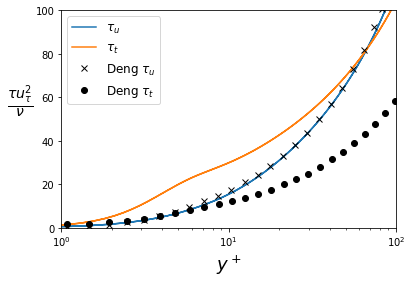

In [1283]:
df_val_tauu = pd.read_csv("validation_data/Deng(2001)_tauu.csv", 
                         sep='\t', header=None, names=['yplus','tauu'])
df_val_taut = pd.read_csv("validation_data/Deng(2001)_taut.csv", 
                         sep='\t', header=None, names=['yplus','taut'])
fig, ax = plt.subplots()
df_num['tau_u'] = df_num['k']/df_num['eps']*(Re)
df_num['tau_t'] = df_num['kt']/df_num['epst']*(Re)
df_num['ratio'] = df_num['tau_u']/df_num['tau_t']
df_num.plot('yplus', 'tau_u',ax=ax, label=r'$\tau_u$')
df_num.plot('yplus', 'tau_t',ax=ax, label=r'$\tau_t$')

df_val_tauu.plot('yplus', 'tauu',
                 ax=ax, marker='x', label="Deng "+r'$\tau_u$',
                 linestyle="None", color='k')
df_val_taut.plot('yplus', 'taut',
                 ax=ax, marker='o', label="Deng "+r'$\tau_t$',
                 linestyle="None", color='k')
ax.set_xlabel("$y^+$", fontsize=18)
ax.set_ylabel(r"$\frac{\tau u_{\tau}^2}{\nu}$", 
              fontsize=20, rotation=0, labelpad=15)
ax.set_xscale("log")
ax.set_xbound(1,100)
ax.set_ybound(0,100)
ax.legend(prop={'size': 12})